<a href="https://colab.research.google.com/github/RealThanosP/pred-main-mod/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data on the server session
!git clone https://github.com/RealThanosP/pred-main-mod
%cd pred-main-mod

fatal: destination path 'pred-main-mod' already exists and is not an empty directory.
/content/pred-main-mod


# Dataset:
Helwig, N., Pignanelli, E., & Schtze, A. (2015). Condition monitoring of hydraulic systems [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CW21.


# Getting the sensor files in a list



In [15]:
import os

folder_path = "data/condition+monitoring+of+hydraulic+systems"

# Define the list of sensors and their corresponding column names
sensors = [
    "PS1", "PS2", "PS3", "PS4", "PS5", "PS6",  # Pressure sensors
    "EPS1",  # Motor power
    "FS1", "FS2",  # Volume flow
    "TS1", "TS2", "TS3", "TS4",  # Temperature sensors
    "VS1",  # Vibration
    "CE",  # Cooling efficiency
    "CP",  # Cooling power
    "SE"  # Efficiency factor
]

# Initialize a list to hold the data from each txt file
all_data = []

In [20]:
# Gets all the text files from dataset
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Keeps only the data that have a sensor name in the filename
sensor_files_paths = [f"{folder_path}/{f}" for f in txt_files if any(sensor in f for sensor in sensors)]


## Plot the data

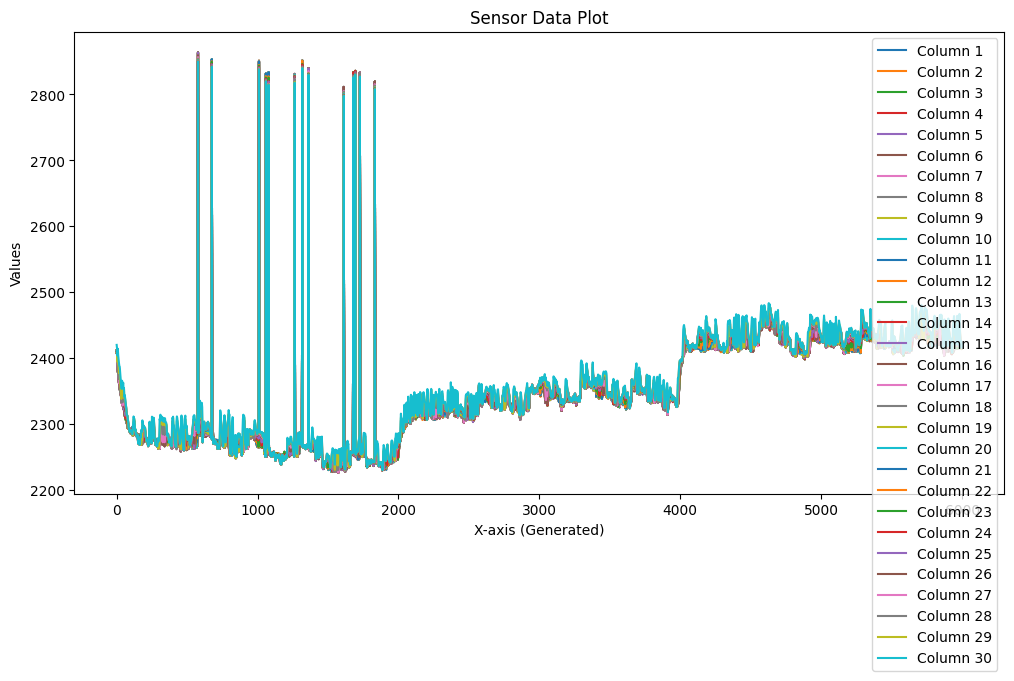

In [73]:
df = pd.read_csv(sensor_files_paths[1], sep="\t", header = None)
# Name the columns and the rows
df.columns = [f"{time + 1}" for time in range(0, df.shape[1])]
df.index = [f"{time + 1}" for time in range(0, df.shape[0])]

num_col = len(df.columns)
num_row = len(df.index)

# Generate x-axis based on np.linspace
x = np.linspace(0, num_col, num_row)

# Select a subset of columns to plot (e.g., first 5)
df_subset = df.iloc[:, :30]

# Plot each selected column
plt.figure(figsize=(12, 6))
for col in df_subset.columns:
    plt.plot(x, df_subset[col], label=f"Column {col}")

plt.xlabel("X-axis (Generated)")
plt.ylabel("Values")
plt.title("Sensor Data Plot")
plt.legend()
plt.show()